# SHs Expansion and Mesh Generation

* Input: spherical harmonics coefficients
* Output: triangular surface mesh, plots
* Budi Zhao 2020-03



## Load packages and functions

In [1]:
# packages
import numpy as np
import scipy.io as sio
#from matplotlib import interactive
#interactive(False)
# load functions
from funcs import *
from SHPSG import *

/home/budi/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  return f(*args, **kwds)


## Main program
* Generate coefficients based on shape factors
* Construct triangular mesh by icosahedron subdivision
* Produce stl file and png image

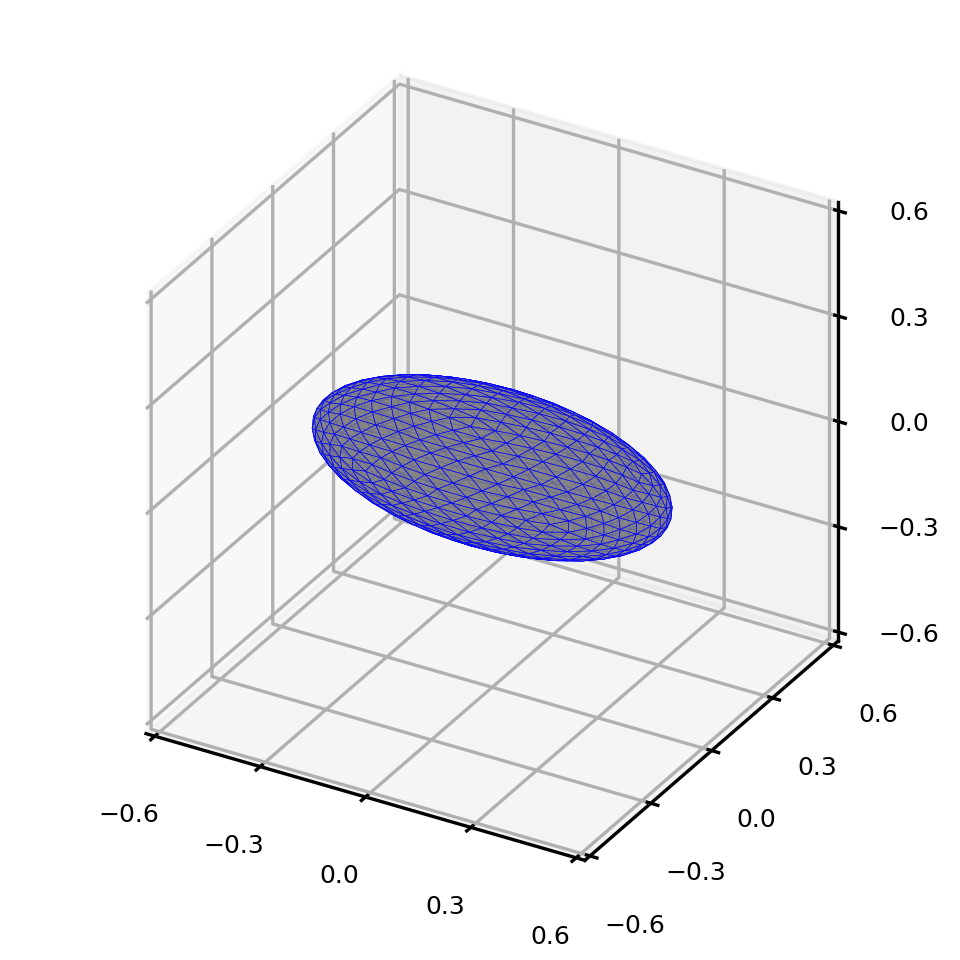

In [7]:
# create coefficients
Ei,Fi = 2/5,1
D2_8 = [0.0]
D9_15 = [0.0]
# generate surface grids
vertices, faces = icosahedron()
for i in range(3): 
    # subdivide surface
    vertices, faces = subdivsurf(faces,vertices)
    # remove duplicate vertices
    vertices, faces = cleanmesh(faces,vertices)
# convert from Cartesian to spherical
sph_cor = car2sph(vertices)

# random generate particle shapes
for j in range(len(D2_8)):
    for k in range(len(D9_15)):
        for i in range(1):
            # random generate SH coefficients
            coeff = SHPSG(Ei,Fi,D2_8[j],D9_15[k])
            # convert to spherical coordinates
            stlpath = './data/D2_8_'+str('%.1f' % D2_8[j])+'_par'+str(i)+'.stl'
            figpath = './data/D2_8_'+str('%.1f' % D2_8[j])+'_par'+str(i)+'.png'
            sh2stl(coeff, sph_cor, vertices, faces,stlpath)
            plotstl(stlpath,figpath)

In [3]:
len(faces)

320